<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Support vector machine (SVM) </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>February 15, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. What is a support vector machine?
<hr style="height:1px;border:none" />

## The line must be drawn here

Let's say, you have two clusters of data points that are separated from each other. 

In [1]:
%matplotlib inline

`<SVM_2Clusters.py>`

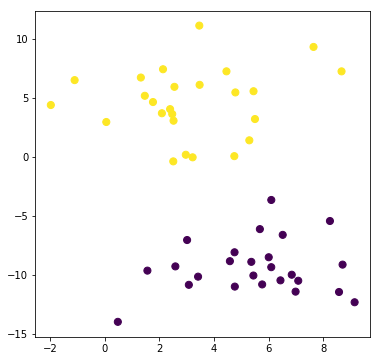

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# producing a toy data set: two clusters, separated
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=10, cluster_std=2.5)


# plotting the toy data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

Now, you want to draw a boundary between the two clusters, so that any future observations can be classified by which side of the boundary they lie. You can draw many possible boundaries, for example.

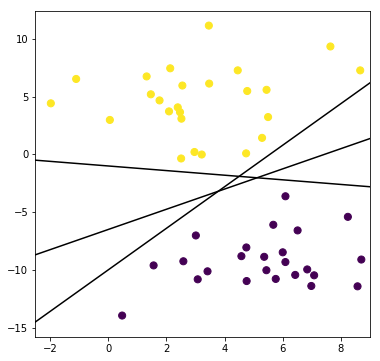

In [3]:
# plotting possible boundaries
xMin = -2.5
xMax = 9.0
xfit = np.linspace(xMin, xMax)
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b in [(0.875, -6.5), (-0.2, -1), (1.8, -10)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(xMin, xMax)
plt.show()

Now, which one is the most appropriate in this case? We can use a criterion that the boundary must separate the two clusters the most. In other words, the distance between the observations and the boundary must be maximized.

In our example, let's examine the distance between the boundary and the data point closest to the boundary, known as the **margin**.

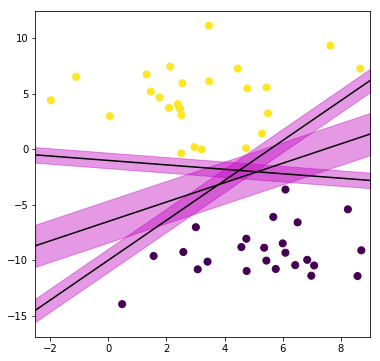

In [4]:
# plotting possible boundaries with margins
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
for m, b, d in [(0.875, -6.5, 1.9), (-0.2, -1, 0.7), (1.8, -10, 1.05)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'k-')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='m', alpha=0.4)
plt.xlim(xMin, xMax)
plt.show()

As you notice, the margin is different between the different boundaries. The goal of the **support vector machine** **(SVM)** algorithm is to find the boundary that maximizes the margin.

## SVM, a simple example

The SVM algorithm is implemented in **`sklearn.svm`** as the **`SVC`** transformation object. Here is how we can use the `SVC` object.

In [5]:
# SVM
sv = SVC(kernel='linear', C=10000)
sv.fit(X,y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Here, we define the `SVC` object with two parameters. The parameter **`kernel='linear'`** defines that the boundary is a line (thus *linear*). The parameter **`C=10000`** defines the penalty for the error term. We will explore this `C` parameter later. Once the `SVC` object is defined, then we use the **`.fit`** method to fit the data (features and targets) to run the SVM algorithm. Here is the result.

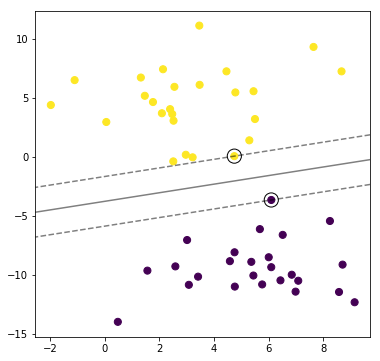

In [6]:
# plotting the descision boundary with SVM, with margins
# as well as support vectors
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

# suppor for the meshgrid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = sv.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(sv.support_vectors_[:, 0], sv.support_vectors_[:, 1], s=200,
           linewidth=1, edgecolors='k', facecolors='none')

plt.show()

You don't have to worry about the code to produce this plot. Here, the line indicates the boundary, and the dotted lines indicate the margin. The closest points on both sides of the boundary are circled. These points are called **support vectors** (SV) (the namesake of the SVM algorithm). These boundaries are pivotal in defining the boundary. In fact, these are the only points needed to define the boundary.

You can examine the coordinates of these support vectors by the **`.support_vectors_`** of the SVM object. The coordinate for the first SV is

In [7]:
# coordinate for the first SV
print(sv.support_vectors_[0,:])

[ 6.09158828 -3.62254269]


It looks like this SV belongs to the purple cluster. The coordinate for the second SV is

In [8]:
# coordinate for the second SV
print(sv.support_vectors_[1,:])

[ 4.74046126  0.08979735]


And this belongs to the yellow cluster.

## SVM classifier

Of course, the point of finding the boundary is so that we can use it to classify observations. To demonstrate, we split the toy data into a training and testing data sets. The testing data contains 10 observations (as specified by **`test_size=10`**).

In [9]:
# split the toy data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=10, 
                                                    random_state=0)

Now let's run SVM on the training data. As in other classifiers you have seen before, you can use the **`.predict`** method with the testing data to produce predicted class labels.

In [10]:
# SVM fitting
sv_train = SVC(kernel='linear', C=10000)
sv_train.fit(X_train,y_train)

# SVM classifier
y_pred = sv_train.predict(X_test)

And finally, let's see the classification results.

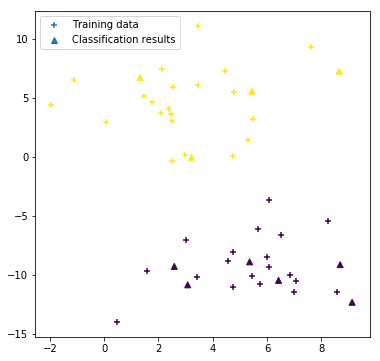

In [11]:
# plotting the training data and classification outcome
plt.figure(figsize=[6,6])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='+',
            label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='^',
            label='Classification results')
plt.legend()
plt.show()

Since these are well-separated clusters, we had a pretty good classification outcome.

# 2. Hard and soft margins
<hr style="height:1px;border:none" />

Now let's consider a case where two clusters are not clearly separated, but have some overlap.

`<SVM_SoftMargins.py>`

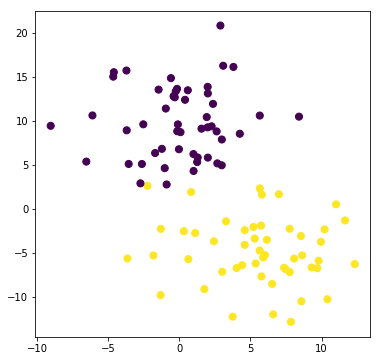

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC


def plot_svm_margin(X,y,sv):
    '''
    Input:
         X:  2D data matrix
         y:  Target vector
         sv: Support vector machine results
    Returns:
         None
    Produces:
         A scatter plot of the data X, with colors defined by y.
         SVM boundary, as well as the margin is plotted. Also
         support vectors are indicated.

         You need to run plt.show() after everything is done.
    '''
    # scatter plot first
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

    # suppor for the meshgrid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = sv.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(sv.support_vectors_[:, 0], sv.support_vectors_[:, 1], s=200,
               linewidth=1, edgecolors='k', facecolors='none')


# producing a toy data set: two clusters, with some overlap
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=23, cluster_std=3.75)


# plotting the toy data
plt.figure(figsize=[6,6])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()


(Here, don't worry about the function `plot_svm_margin`.) As you can see, the two clusters are touching a little bit. In a case like this, a simple line cannot separate the two clusters without some misclassification. The parameter **`C`** mentioned earlier controls how much such misclassification you allow. In other words, how many observations may lie within the classification margin. A large value of **`C`** permits fewer observations in the margin, whereas a smaller value of `C` allows many observations to lie within the margin. Here are examples of SVM with different values of `C` (large:**`C=10`**, medium:**`C=1.0`**(default in SVC), small:**`C=0.1`**, and tiny:**`C=0.01`**).

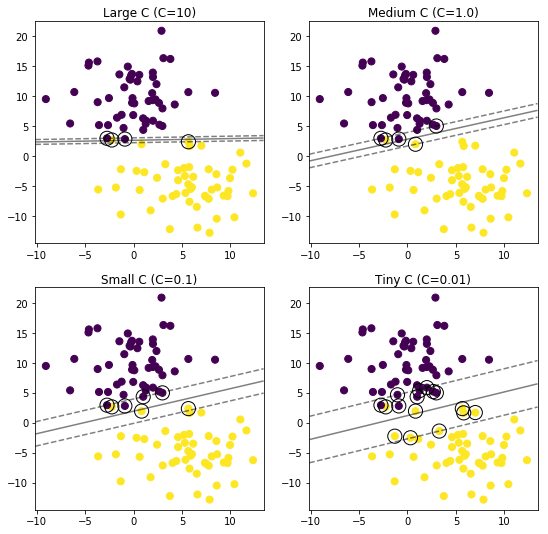

In [3]:
# SVM
plt.figure(figsize=[9,9])

svL = SVC(kernel='linear', C=10)  # large C (C=10)
svL.fit(X,y)
plt.subplot(221)
plot_svm_margin(X,y,svL)
plt.title('Large C (C=10)')

svM = SVC(kernel='linear', C=1.0)  # medium C (C=1.0)
svM.fit(X,y)
plt.subplot(222)
plot_svm_margin(X,y,svM)
plt.title('Medium C (C=1.0)')

svS = SVC(kernel='linear', C=0.1)  # small C (C=0.1)
svS.fit(X,y)
plt.subplot(223)
plot_svm_margin(X,y,svS)
plt.title('Small C (C=0.1)')

svT = SVC(kernel='linear', C=0.01)  # tiny C (C=0.01)
svT.fit(X,y)
plt.subplot(224)
plot_svm_margin(X,y,svT)
plt.title('Tiny C (C=0.01)')

plt.show()

As you can see, the larger the parameter `C`, the fewer the number of support vectors lying within the margin. And vice versa. 

So, how do we determine the value of `C` that works for your data? We do so by fitting different training data sets repeatedly and evaluate the classifier performance, the process known as *cross validation*. We will cover cross validation later in the semester.

# 3. Example: cryotherapy data
<hr style="height:1px;border:none" />

Recall the cryotherapy data from the [logistc regression](https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/Logistic.ipynb) lecture. Some features are highly associated with the success of the cryotherapy. We will focus on continuous features, **`Age`**, **`Time`**, and **`Area`**.

First, we plot these features and see if the two classes of the outcome (success: **`Success=1`** (**green**) or failure: **`Success=0`** (**red**)).

`<CryoSVM.py>`

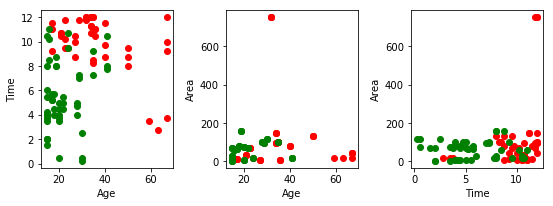

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# loading the data
CryoData = pd.read_csv('Cryotherapy.csv')

# plotting the Age, Time, and Area
plt.figure(figsize=[9,3])
pColor = ['r','g']
plt.subplot(131)
for i in range(2):
    plt.plot(CryoData[CryoData.Success==i].Age,
             CryoData[CryoData.Success==i].Time,
             marker='o',ls='none',c=pColor[i])
plt.xlabel('Age')
plt.ylabel('Time')

plt.subplot(132)
for i in range(2):
    plt.plot(CryoData[CryoData.Success==i].Age,
             CryoData[CryoData.Success==i].Area,
             marker='o',ls='none',c=pColor[i])
plt.xlabel('Age')
plt.ylabel('Area')

plt.subplot(133)
for i in range(2):
    plt.plot(CryoData[CryoData.Success==i].Time,
             CryoData[CryoData.Success==i].Area,
             marker='o',ls='none',c=pColor[i])
plt.xlabel('Time')
plt.ylabel('Area')

plt.subplots_adjust(wspace=0.4, bottom=0.15)
plt.show()


Notice that there are some outlying observations in **`Area`**. However, as long as these observations are not selected as support vectors (i.e., sufficiently distant from the boundary), such observations do not affect the SVM classifier.

### Exercise
1. **Cryotherapy SVM, training and testing data**. Here we will focus on only the three features mentioned above: `Age`, `Time`, and `Area`. Split the data set into training and testing data sets, with the testing data set comprising 30% of observations. ***NB:*** *First you need to create a data set comprising the three features only.*
2. **Cryotherapy SVM, fitting and classification**. Fit the training data set to an SVM. Use **`C=1.0`**. Then classify the testing data set. Evaluate the performance of the classifier by a confusion matrix and a classification report.

# 4. Multi-class SVM
<hr style="height:1px;border:none" />

# 5. Example: iris data
<hr style="height:1px;border:none" />